# Check out the CIFAR10 images

In [1]:
import torch
import torch.utils.data as data
import torchvision
from torchvision import transforms
from torchvision import datasets
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\YWANG\\Federated-Learning-PyTorch'

In [33]:
# # standard normalization
# mean_0 = (0.5, 0.5, 0.5)
# std_0 = (0.5, 0.5, 0.5)

# # standard transform for training data
# transform_train_0 = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean_0,std_0),
# ])

# # standard transform for test data
# transform_test_0 = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean_0,std_0),
# ])

# alternative normilzation
mean_1 = (0.4914, 0.4822, 0.4465)
std_1 = (0.2023, 0.1994, 0.2010)

# Alternative transform for training data
# enhanced transform, random crop and flip is optional
transform_train_1 = transforms.Compose([
    transforms.RandomCrop(size=32),
#     transforms.CenterCrop(size=24),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean_1,std_1),
])

# alternative transform for test data
transform_test_1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_1,std_1)
])

In [34]:
data_dir = 'data\\cifar'
dataset_train = datasets.CIFAR10(data_dir, train=True, download=True, transform=transform_train_1)
dataset_test = datasets.CIFAR10(data_dir, train=False, download=True, transform=transform_test_1)
loader_train = data.DataLoader(dataset_train, batch_size=100, shuffle=True)
loader_test = data.DataLoader(dataset_test, batch_size=100, shuffle=False)
print(len(loader_train.dataset)) # number of images of the enture training dataset

Files already downloaded and verified
Files already downloaded and verified
50000


In [35]:
# images, labels = next(iter(loader_test))
# images.shape

In [40]:
idx = np.random.randint(1,len(loader_train.dataset))
print(idx)
images, labels = loader_train.dataset[idx]
print(images.shape)

9144
torch.Size([3, 32, 32])


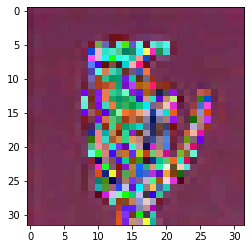

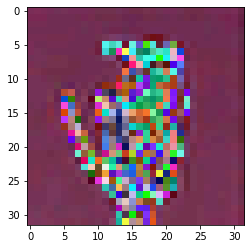

In [41]:
img = images.permute(1,2,0).numpy() * 255 # convert torch tensor to numpy array for imshow
plt.figure()
# plt.xlim(0,31)
# plt.ylim(0,31)
plt.imshow(img.astype(np.uint8))
plt.figure()
img2, _ = dataset_train[idx]
img2 = img2.permute(1,2,0).numpy() * 255
plt.imshow(img2.astype(np.uint8))